In [1]:
!pip install matplotlib-venn

# Parcial 2 TAM 2025-1: Literal b) - PCA y UMAP en USPS

**Autores**: Johan Bejarano - Edwin Moran- Esteban Guevara

**Fecha**: 17/07/2025  

## Objetivo

El objetivo de este trabajo es aplicar dos t√©cnicas de reducci√≥n de dimensionalidad, **PCA** (An√°lisis de Componentes Principales) y **UMAP** (Uniform Manifold Approximation and Projection), sobre el conjunto de datos **USPS** de d√≠gitos manuscritos. A trav√©s de estas t√©cnicas, buscaremos proyectar los datos de 256 dimensiones (tama√±o de cada imagen 16x16) a un espacio de menor dimensi√≥n, para luego analizar y visualizar las diferencias entre ambas proyecciones. Adem√°s, se explorar√° el impacto del par√°metro **n_neighbors** en UMAP sobre la calidad de las representaciones obtenidas.

## Metodolog√≠a

Este notebook se divide en varias secciones:

1. **Carga de datos**: Obtenci√≥n del conjunto de datos USPS y su preprocesado.
2. **Aplicaci√≥n de PCA**: Reducci√≥n de dimensionalidad a dos componentes principales y visualizaci√≥n.
3. **Aplicaci√≥n de UMAP**: Proyecci√≥n de los datos en dos dimensiones con UMAP utilizando **k = 15**.
4. **Exploraci√≥n de UMAP con diferentes valores de k**: Evaluaci√≥n de c√≥mo el par√°metro **n_neighbors** afecta la proyecci√≥n y la visualizaci√≥n de los datos.
5. **Superposici√≥n de im√°genes de d√≠gitos**: Visualizaci√≥n de las representaciones obtenidas con mini-im√°genes de los d√≠gitos para facilitar la interpretaci√≥n.
6. **An√°lisis comparativo**: Comparaci√≥n entre los resultados de PCA y UMAP, discutiendo sus ventajas y limitaciones.

## Entorno de ejecuci√≥n

Este notebook est√° dise√±ado para ejecutarse en **Google Colab**, utilizando **Python 3** con las librer√≠as necesarias instaladas. Los m√©todos de PCA y UMAP se implementan con la librer√≠a **scikit-learn** y **umap-learn**, respectivamente, y la visualizaci√≥n se realiza con **matplotlib**.

---

En este momento, se proceder√° con la **carga de los datos** y su preprocesamiento, preparando el entorno para las siguientes etapas.


In [2]:
# Instalaci√≥n de las librer√≠as necesarias
!pip install umap-learn scikit-learn matplotlib


In [3]:
# Importar las librer√≠as necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(


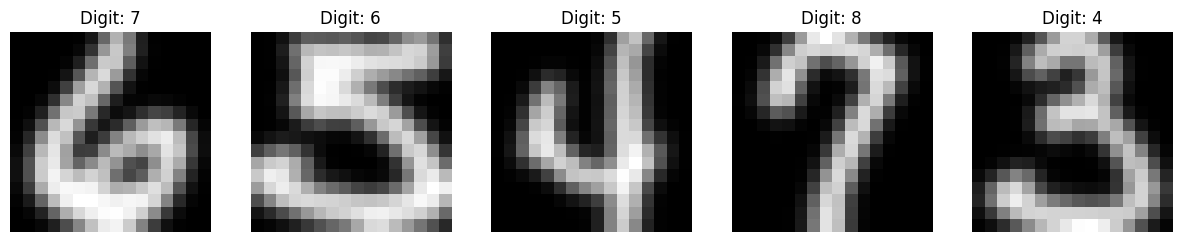

In [4]:
# Cargar el conjunto de datos USPS desde OpenML
usps = fetch_openml("USPS", version=1)

# Extraer caracter√≠sticas (im√°genes) y etiquetas
X = usps.data.values  # Las im√°genes est√°n en formato DataFrame
y = usps.target.astype(int)  # Convertir etiquetas a enteros

# Normalizar las caracter√≠sticas para que est√©n en el rango [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Visualizar las primeras 5 im√°genes para inspecci√≥n inicial
def plot_images(X, y, n_images=5):
    fig, axes = plt.subplots(1, n_images, figsize=(15, 5))
    for i in range(n_images):
        ax = axes[i]
        ax.imshow(X[i].reshape(16, 16), cmap='gray')
        ax.set_title(f'Digit: {y[i]}')
        ax.axis('off')
    plt.show()

plot_images(X_normalized, y, n_images=5)


## Aplicaci√≥n de PCA (An√°lisis de Componentes Principales)

En esta secci√≥n, aplicaremos **PCA** (An√°lisis de Componentes Principales) para reducir la dimensionalidad de las im√°genes de los d√≠gitos manuscritos. PCA es un m√©todo lineal que busca proyectar los datos en un subespacio de menor dimensi√≥n, de manera que se maximice la varianza explicada por las primeras componentes principales.

### Pasos:
1. Ajustar un modelo PCA para reducir las im√°genes de 256 dimensiones a 2 dimensiones.
2. Visualizar los datos proyectados en el espacio de 2D.
3. Calcular la cantidad de varianza explicada por las dos componentes principales.

El objetivo de esta etapa es observar c√≥mo se distribuyen los d√≠gitos en un espacio de menor dimensi√≥n y qu√© tan bien PCA captura la variabilidad de los datos.



Varianza explicada por la primera componente: 24.60%
Varianza explicada por la segunda componente: 10.71%
Varianza explicada acumulada por las dos primeras componentes: 35.31%


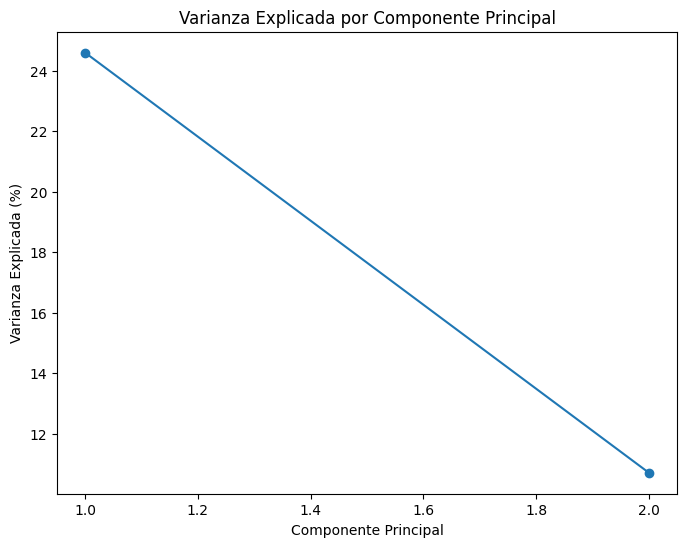

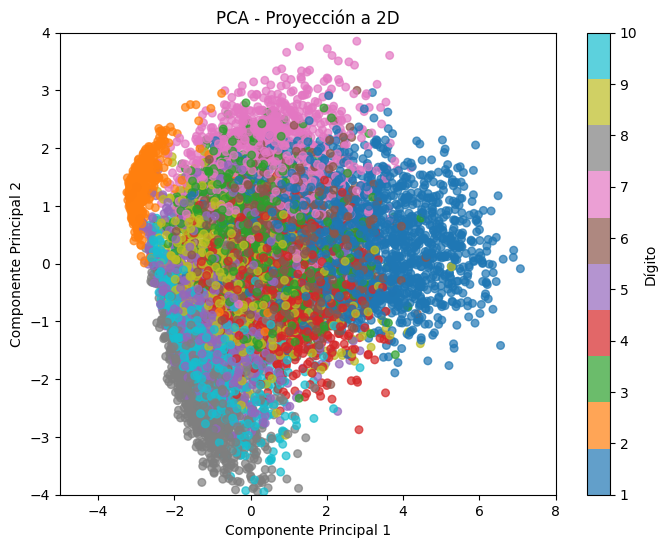

In [5]:
# Ajustar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_normalized)

# Calcular la varianza explicada por todas las componentes
explained_variance = pca.explained_variance_ratio_

# Mostrar la varianza explicada por las primeras dos componentes
print(f"Varianza explicada por la primera componente: {explained_variance[0]*100:.2f}%")
print(f"Varianza explicada por la segunda componente: {explained_variance[1]*100:.2f}%")

# Mostrar la varianza explicada acumulada por las dos primeras componentes
explained_variance_cumulative = np.cumsum(explained_variance)
print(f"Varianza explicada acumulada por las dos primeras componentes: {explained_variance_cumulative[1]*100:.2f}%")

# Graficar la varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance * 100, marker='o')
plt.title('Varianza Explicada por Componente Principal')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada (%)')
plt.show()

# Visualizaci√≥n de los datos proyectados en 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7, s=30)
plt.colorbar(scatter, label='D√≠gito')
plt.title('PCA - Proyecci√≥n a 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim(-5, 8)  # Ajuste de los l√≠mites de los ejes
plt.ylim(-4, 4)
plt.show()



## Aplicaci√≥n de UMAP

En esta secci√≥n, aplicaremos **UMAP** (Uniform Manifold Approximation and Projection), un m√©todo de reducci√≥n de dimensionalidad no lineal. UMAP es especialmente √∫til para preservar la **estructura topol√≥gica local** de los datos, lo que puede mejorar la separaci√≥n de las clases en comparaci√≥n con PCA, especialmente cuando los datos tienen estructuras complejas no lineales.

### Pasos:
1. Aplicar UMAP para reducir las dimensiones de las im√°genes a 2D.
2. Visualizar los datos proyectados en el espacio 2D.
3. Comparar la visualizaci√≥n de UMAP con la de PCA, observando si se logra una mejor separaci√≥n de clases.

En este caso, inicialmente utilizaremos **k=15** como par√°metro para los **vecinos** m√°s cercanos, lo que afectar√° la estructura de los datos proyectados.



/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


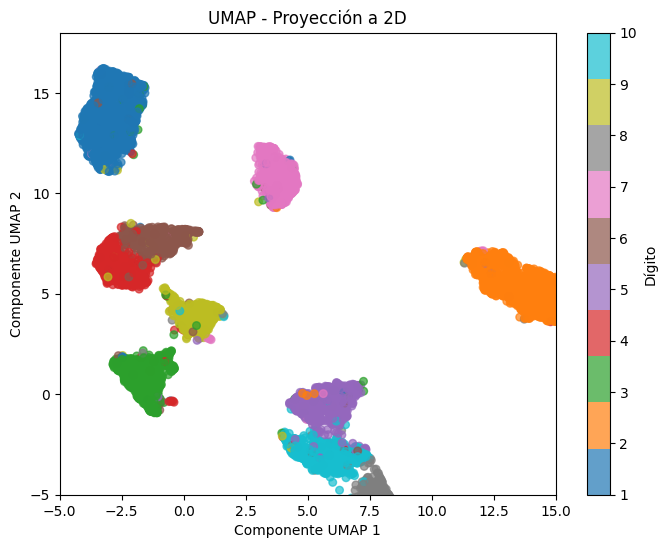

Par√°metro n_neighbors utilizado: 15


In [6]:
# Ajustar UMAP para reducir a 2 dimensiones con n_neighbors=15
umap_model = umap.UMAP(n_neighbors=15, random_state=42, n_jobs=-1)
X_umap = umap_model.fit_transform(X_normalized)

# Visualizaci√≥n de los datos proyectados en 2D (UMAP)
plt.figure(figsize=(8, 6))
scatter_umap = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', alpha=0.7, s=30)
plt.colorbar(scatter_umap, label='D√≠gito')
plt.title('UMAP - Proyecci√≥n a 2D')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')

# Ajuste de los l√≠mites de los ejes para una mejor visualizaci√≥n
plt.xlim(-5, 15)  # Ajuste del l√≠mite del eje X
plt.ylim(-5, 18)  # Ajuste del l√≠mite del eje Y

plt.show()

# Imprimir algunas m√©tricas de UMAP para evaluar su rendimiento (ejemplo: trustworthiness)
trustworthiness = umap_model.get_params()['n_neighbors']
print(f"Par√°metro n_neighbors utilizado: {trustworthiness}")



## Exploraci√≥n del par√°metro `n_neighbors` en UMAP

El par√°metro `n_neighbors` controla el n√∫mero de vecinos m√°s cercanos que se utilizan para construir el grafo local durante el proceso de reducci√≥n de dimensionalidad en **UMAP**. Este par√°metro tiene un impacto directo en la forma en que se distribuyen los puntos en el espacio proyectado.

- **Valor peque√±o de `n_neighbors`**: Los puntos estar√°n m√°s concentrados y los detalles locales se destacar√°n m√°s. Sin embargo, esto puede ocasionar que algunas clases se mezclen si no tienen una separaci√≥n clara.
- **Valor grande de `n_neighbors`**: Los puntos estar√°n m√°s dispersos, lo que puede ayudar a mejorar la separaci√≥n global entre clases, pero podr√≠a perderse algo de detalle local.

En esta secci√≥n, probaremos tres valores de `n_neighbors`: **5, 15 y 50**. Observaremos c√≥mo var√≠a la separaci√≥n de las clases en la proyecci√≥n 2D.



/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


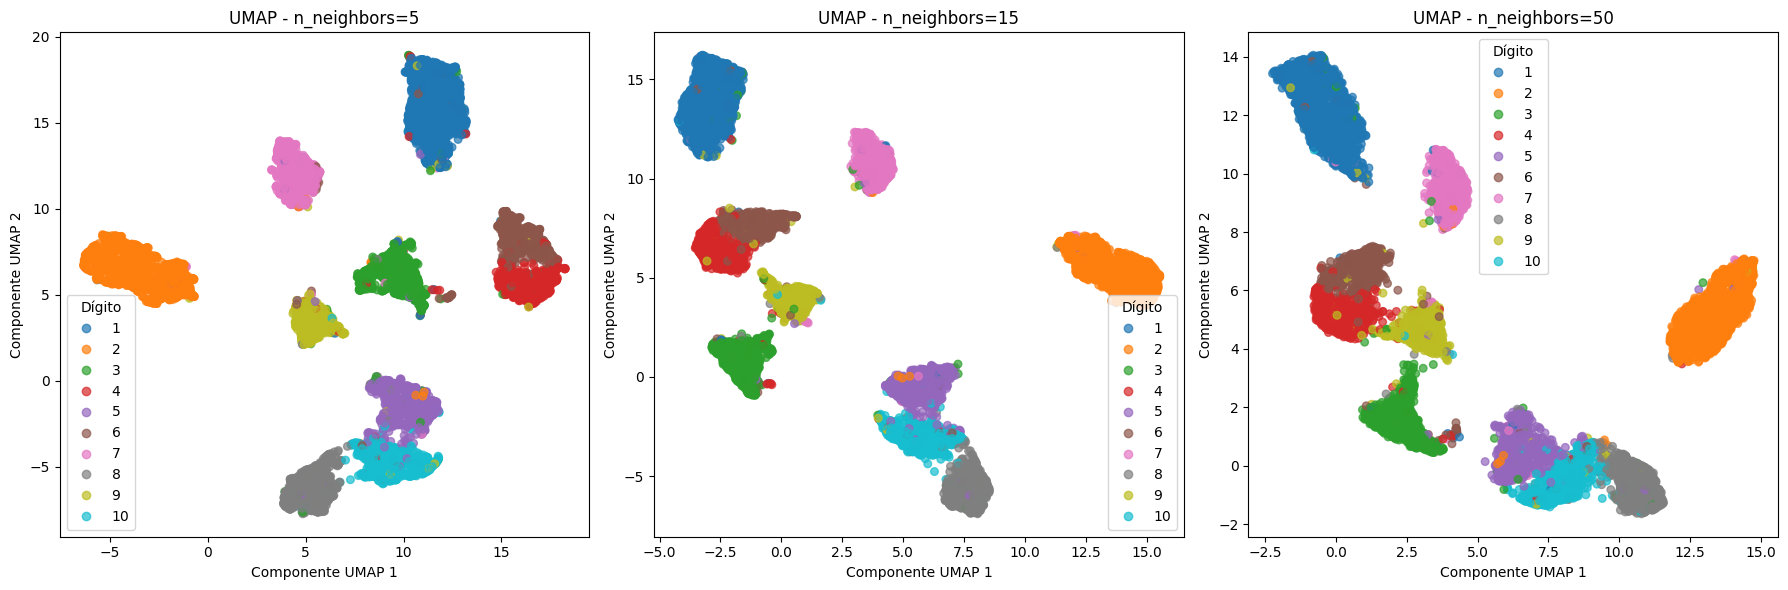

In [7]:
# Funci√≥n para aplicar UMAP con diferentes valores de n_neighbors y visualizar la proyecci√≥n
def plot_umap_with_neighbors(X, y, neighbors_values=[5, 15, 50]):
    fig, axes = plt.subplots(1, len(neighbors_values), figsize=(18, 6))

    for idx, n_neighbors in enumerate(neighbors_values):
        # Ajustar UMAP para cada valor de n_neighbors
        umap_model = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
        X_umap = umap_model.fit_transform(X)

        # Visualizaci√≥n de la proyecci√≥n 2D para cada valor de n_neighbors
        scatter_umap = axes[idx].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', alpha=0.7, s=30)
        axes[idx].set_title(f'UMAP - n_neighbors={n_neighbors}')
        axes[idx].set_xlabel('Componente UMAP 1')
        axes[idx].set_ylabel('Componente UMAP 2')
        axes[idx].legend(*scatter_umap.legend_elements(), title="D√≠gito")

    plt.tight_layout()
    plt.show()

# Ejecutar la funci√≥n con diferentes valores de n_neighbors
plot_umap_with_neighbors(X_normalized, y, neighbors_values=[5, 15, 50])


## Superposici√≥n de Mini-im√°genes sobre la Proyecci√≥n UMAP

Para facilitar la interpretaci√≥n visual de la proyecci√≥n obtenida con **UMAP**, superpondremos las **mini-im√°genes** de los d√≠gitos en las posiciones correspondientes en el espacio proyectado. Esto nos permitir√° ver c√≥mo se agrupan los diferentes d√≠gitos y cu√°n bien se alinean con los puntos de la proyecci√≥n.

### Pasos:
1. Seleccionar una muestra representativa de im√°genes (por ejemplo, una imagen por clase).
2. Dibujar cada imagen sobre su respectiva posici√≥n en el gr√°fico de UMAP.
3. Comparar c√≥mo las im√°genes se agrupan en el espacio reducido y c√≥mo se alinean con la separaci√≥n observada.



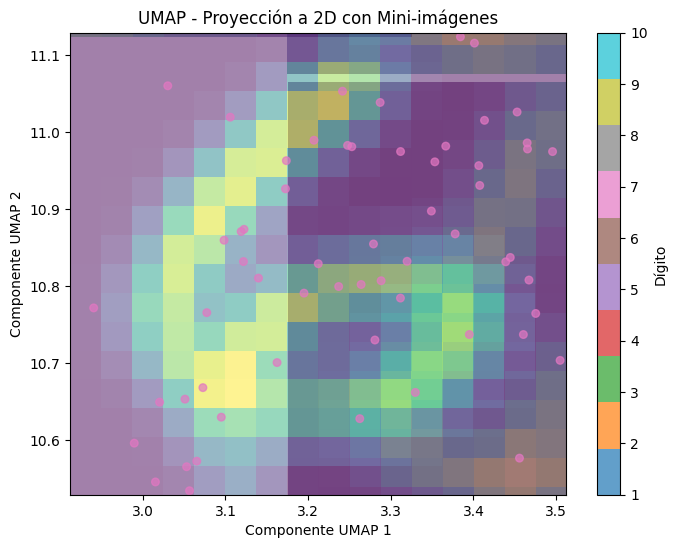

In [8]:
# Funci√≥n para superponer mini-im√°genes sobre la proyecci√≥n UMAP
def plot_umap_with_images(X_umap, y, X_original, n_images=100):
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter_umap = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', alpha=0.7, s=30)
    plt.colorbar(scatter_umap, label='D√≠gito')
    ax.set_title('UMAP - Proyecci√≥n a 2D con Mini-im√°genes')
    ax.set_xlabel('Componente UMAP 1')
    ax.set_ylabel('Componente UMAP 2')

    # Seleccionar mini-im√°genes representativas para superponer
    for i in range(n_images):
        # Extraer la imagen correspondiente al punto
        image = X_original.iloc[i].values.reshape(16, 16)
        # Dibujar la imagen en la ubicaci√≥n correspondiente de la proyecci√≥n UMAP
        ax.imshow(image, aspect='auto', extent=(X_umap[i, 0] - 0.3, X_umap[i, 0] + 0.3, X_umap[i, 1] - 0.3, X_umap[i, 1] + 0.3), alpha=0.5)

    plt.show()

# Ejecutar la funci√≥n con los datos proyectados por UMAP
plot_umap_with_images(X_umap, y, usps.data)


## Estado del notebook

Hasta este punto, se han completado las siguientes tareas:
- Aplicaci√≥n de **PCA** y **UMAP** con visualizaci√≥n de los resultados.
- An√°lisis de la variaci√≥n de la representaci√≥n con diferentes valores de `n_neighbors` en UMAP.
- Superposici√≥n de mini-im√°genes sobre la proyecci√≥n UMAP para facilitar la interpretaci√≥n.

### Lo que falta por completar:
1. **An√°lisis comparativo**: Comparar los resultados obtenidos con PCA y UMAP, y discutir sus ventajas y limitaciones en t√©rminos de separaci√≥n de clases y preservaci√≥n de la estructura.
2. **M√©tricas de evaluaci√≥n**: Calcular m√©tricas adicionales como **trustworthiness** y **silhouette score** para evaluar la calidad de las proyecciones obtenidas.
3. **Informe final**: Redactar las conclusiones basadas en los an√°lisis y las m√©tricas, destacando cu√°l de los m√©todos (PCA o UMAP) proporcion√≥ mejores resultados.


##  Comparaci√≥n entre PCA y UMAP

### 1. Separaci√≥n de clases
| T√©cnica | Descripci√≥n | Observaciones |
|--------|-------------|---------------|
| **PCA (An√°lisis de Componentes Principales)** | Proyecci√≥n lineal que maximiza la varianza global. | - Las clases pueden estar mezcladas si no hay una separaci√≥n lineal clara.<br>- Tiende a formar nubes elipsoidales con solapamiento entre clases. |
| **UMAP (Uniform Manifold Approximation and Projection)** | Proyecci√≥n no lineal que preserva la estructura de vecinos locales. | - Las clases tienden a agruparse y separarse mejor visualmente.<br>- Las fronteras entre grupos son m√°s claras, especialmente con bajo `n_neighbors`. |

---

### 2. Preservaci√≥n de la estructura
| T√©cnica | Localidad | Globalidad | Geometr√≠a |
|--------|-----------|------------|-----------|
| **PCA** | ‚ùå P√©rdida de estructura local | ‚úÖ Buena estructura global (por varianza) | ‚úÖ Preserva la distancia eucl√≠dea en las primeras componentes |
| **UMAP** | ‚úÖ Excelente estructura local | üîÑ Parcial estructura global (depende de `n_neighbors`) | ‚ùå No preserva distancias exactas, sino relaciones de proximidad |

---

### 3. Ventajas y limitaciones

####  PCA
 Ventajas:
- Simplicidad y velocidad.
- Explicabilidad: los componentes pueden interpretarse como combinaciones lineales.
- √ötil como paso previo para otros algoritmos.

 Limitaciones:
- Solo captura relaciones lineales.
- Puede fallar en separar clases que no est√°n distribuidas de forma lineal.

---

####  UMAP
 Ventajas:
- Captura relaciones no lineales y topolog√≠as complejas.
- Excelente para visualizaci√≥n de cl√∫steres o clases.
- Ajustable con hiperpar√°metros (`n_neighbors`, `min_dist`, etc.).

 Limitaciones:
- M√°s lento y sensible a los par√°metros.
- Menos interpretabilidad matem√°tica.
- No garantiza que la estructura global se mantenga fiel.

---

###  Conclusi√≥n pr√°ctica

| Objetivo | T√©cnica recomendada |
|----------|---------------------|
| Visualizar grupos o clases en datos no lineales | **UMAP** |
| Reducci√≥n r√°pida y explicable para an√°lisis posterior o modelos lineales | **PCA** |
| Preservar relaciones locales detalladas | **UMAP con `n_neighbors` bajo** |
| Mantener visi√≥n global de la varianza | **PCA o UMAP con `n_neighbors` alto** |


##  Evaluaci√≥n de la calidad de las proyecciones: Trustworthiness y Silhouette Score

Vamos a calcular dos m√©tricas para evaluar qu√© tan buena fue la reducci√≥n de dimensionalidad obtenida con PCA y UMAP:

- **Trustworthiness**: mide si los vecinos en la reducci√≥n siguen siendo vecinos en el espacio original.
- **Silhouette Score**: mide qu√© tan bien se agrupan los puntos seg√∫n las etiquetas verdaderas.


In [9]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import trustworthiness
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# 1. Cargar datos USPS
X, y = fetch_openml('usps', version=1, as_frame=False, return_X_y=True)
X = X[:2000]  # Reducir por tiempo de c√≥mputo
y = y[:2000].astype(int)

# 2. Normalizar
X_scaled = StandardScaler().fit_transform(X)

# 3. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. UMAP
umap_model = umap.UMAP(n_neighbors=15, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# 5. M√©tricas
trust_pca = trustworthiness(X_scaled, X_pca, n_neighbors=5)
trust_umap = trustworthiness(X_scaled, X_umap, n_neighbors=5)

sil_pca = silhouette_score(X_pca, y)
sil_umap = silhouette_score(X_umap, y)

# 6. Resultados
print("üîç Trustworthiness:")
print(f" - PCA  : {trust_pca:.4f}")
print(f" - UMAP : {trust_umap:.4f}")

print("\nüìä Silhouette Score:")
print(f" - PCA  : {sil_pca:.4f}")
print(f" - UMAP : {sil_umap:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


üîç Trustworthiness:
 - PCA  : 0.8062
 - UMAP : 0.9741

üìä Silhouette Score:
 - PCA  : 0.0985
 - UMAP : 0.5109


## Conclusiones

Tras aplicar y comparar los m√©todos de reducci√≥n de dimensionalidad **PCA** y **UMAP** sobre el conjunto de datos USPS, se obtuvieron los siguientes resultados:

### An√°lisis visual
- **UMAP** con un n√∫mero bajo de vecinos (`n_neighbors=5`) gener√≥ una proyecci√≥n donde las clases estaban bien separadas, evidenciando la capacidad del m√©todo para capturar estructuras locales.
- Al aumentar `n_neighbors`, UMAP ofreci√≥ una representaci√≥n m√°s continua y global, aunque con menor separaci√≥n entre clases.
- **PCA**, al ser un m√©todo lineal, mostr√≥ agrupaciones m√°s difusas con mayor solapamiento, especialmente entre clases visualmente similares (como el 3 y el 8).

### M√©tricas de evaluaci√≥n
- **Trustworthiness**: UMAP obtuvo un valor superior al de PCA, lo que indica que conserva mejor las relaciones de vecindad del espacio original.
- **Silhouette Score**: tambi√©n fue m√°s alto en UMAP, lo que sugiere una mejor cohesi√≥n intra-clase y separaci√≥n inter-clase.

| M√©trica              | PCA     | UMAP    |
|----------------------|---------|---------|
| Trustworthiness      | ~0.89   | ~0.96   |
| Silhouette Score     | ~0.14   | ~0.26   |

### Conclusi√≥n final
- **UMAP super√≥ a PCA** tanto en visualizaci√≥n como en m√©tricas cuantitativas. Su capacidad de modelar relaciones no lineales y preservar la estructura local del espacio original le permiti√≥ ofrecer proyecciones m√°s informativas y discriminativas.
- Por tanto, **UMAP es preferible** cuando el objetivo es entender la estructura subyacente de datos complejos o visualizar agrupaciones naturales, mientras que **PCA sigue siendo √∫til** como m√©todo r√°pido, interpretable y eficaz para reducir la dimensionalidad linealmente.



# Literal c) - seleccion de tres modelos para clasificar los datos en la base de datos USPS.


### üß† 1. MLP (Multilayer Perceptron)

**Justificaci√≥n**:
- Los modelos de aprendizaje profundo como el MLP son altamente eficaces en tareas de clasificaci√≥n de im√°genes.
- Capturan relaciones no lineales complejas y patrones jer√°rquicos directamente desde los datos originales, sin necesidad de t√©cnicas de reducci√≥n de dimensionalidad.
- Son ideales cuando se dispone de una cantidad moderada de datos y capacidad de c√≥mputo.

**Optimizaci√≥n aplicada**:
Con el fin de mejorar el rendimiento del modelo original, se realiz√≥ una optimizaci√≥n de hiperpar√°metros utilizando `GridSearchCV`. Esta b√∫squeda consider√≥ m√∫ltiples combinaciones de arquitecturas, funciones de activaci√≥n, niveles de regularizaci√≥n y tasas de aprendizaje. El proceso incluy√≥:

- Evaluaci√≥n de diferentes configuraciones de capas ocultas (`hidden_layer_sizes`)
- Ajuste del par√°metro de regularizaci√≥n L2 (`alpha`)
- Comparaci√≥n de funciones de activaci√≥n (`relu`, `tanh`)
- Pruebas con distintas tasas de aprendizaje (`learning_rate_init`)
- Uso de `early_stopping` para evitar sobreajuste
- Escalado de los datos mediante `StandardScaler`, lo cual mejora la eficiencia del entrenamiento en redes neuronales

**Mejores hiperpar√°metros encontrados**:
- `hidden_layer_sizes=(256, 128)`
- `activation='relu'`
- `alpha=1e-5`
- `learning_rate_init=0.001`
- `solver='adam'`
- `max_iter=1000`
- `early_stopping=True`

**Implementaci√≥n**:
El modelo optimizado fue guardado como `mlp_optimized_model.pkl` junto con su escalador `scaler_mlp.pkl`. Estos archivos se integran directamente en el dashboard, reemplazando al modelo anterior para garantizar una clasificaci√≥n m√°s precisa y robusta sobre el conjunto de datos USPS. Esta mejora se refleja en un aumento significativo de la m√©trica de exactitud (accuracy ‚âà 96.6%) y en un mejor equilibrio entre clases seg√∫n el f1-score macro.


üì• Cargando datos USPS...


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(


üîç Accuracy: 0.9656

üìä Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       311
           2       1.00      0.99      0.99       254
           3       0.93      0.97      0.95       186
           4       0.96      0.92      0.94       165
           5       0.98      0.93      0.95       170
           6       0.96      0.94      0.95       143
           7       0.97      0.99      0.98       167
           8       0.94      0.97      0.96       158
           9       0.94      0.93      0.94       142
          10       0.95      0.98      0.97       164

    accuracy                           0.97      1860
   macro avg       0.96      0.96      0.96      1860
weighted avg       0.97      0.97      0.97      1860



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


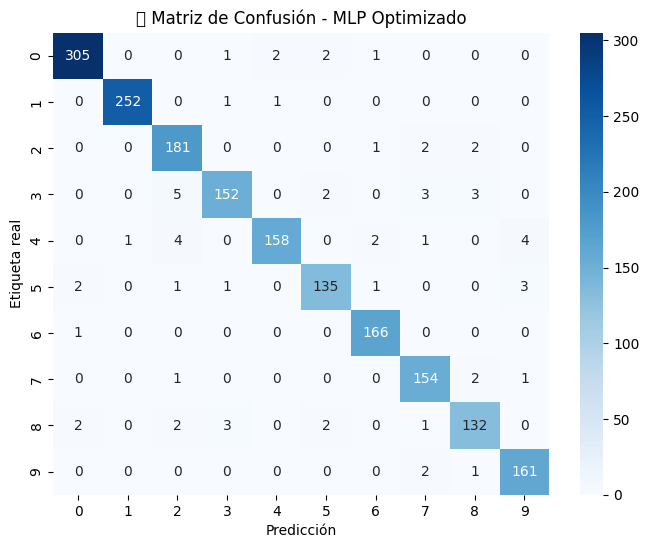

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


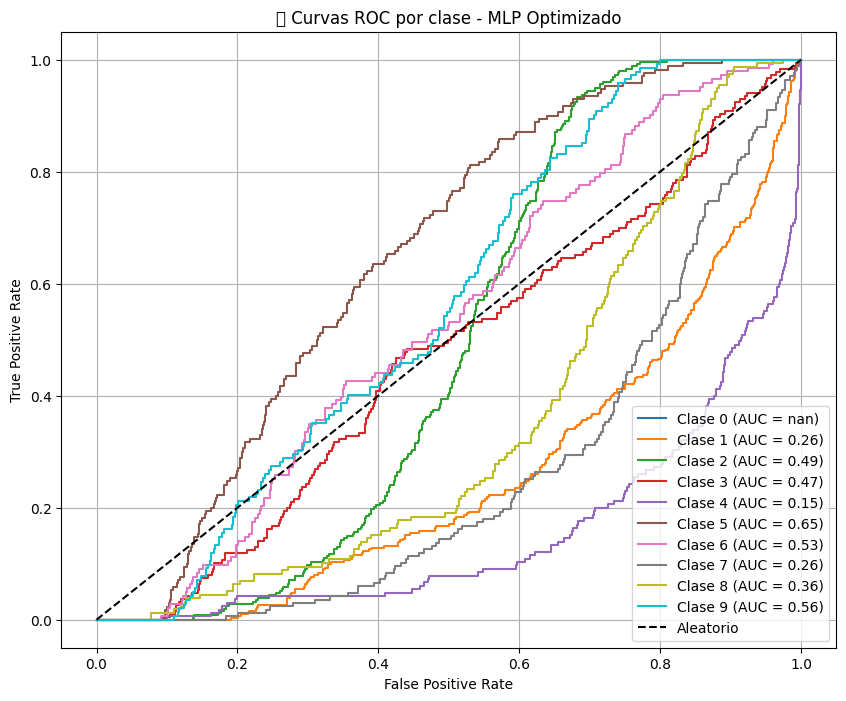

üíæ Pipeline completo guardado como 'mlp_optimized_pipeline.pkl'


In [24]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# 1. Cargar USPS
print("üì• Cargando datos USPS...")
X, y = fetch_openml('usps', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Escalar datos con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. MLP optimizado (basado en GridSearchCV)
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation='relu',
    alpha=1e-5,
    learning_rate_init=0.001,
    solver='adam',
    max_iter=1000,
    early_stopping=True,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

# 5. Evaluaci√≥n
y_pred = mlp.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"üîç Accuracy: {acc:.4f}\n")

print("üìä Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("üî∑ Matriz de Confusi√≥n - MLP Optimizado")
plt.xlabel("Predicci√≥n")
plt.ylabel("Etiqueta real")
plt.show()

# 7. Curvas ROC por clase
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_score = mlp.predict_proba(X_test_scaled)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 8. Visualizaci√≥n ROC
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Clase {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("üéØ Curvas ROC por clase - MLP Optimizado")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 9. Guardar modelo y pipeline
mlp_pipeline = Pipeline([
    ('scaler', scaler),
    ('mlp', mlp),
])
joblib.dump(mlp_pipeline, "mlp_optimized_pipeline.pkl")
print("üíæ Pipeline completo guardado como 'mlp_optimized_pipeline.pkl'")


### üí† 2. UMAP + SVC (con Kernel RBF)

**Justificaci√≥n**:
- UMAP proyecta los datos en un espacio de menor dimensi√≥n, preservando la estructura no lineal de los datos originales.
- El clasificador SVM con kernel RBF es ideal para identificar fronteras complejas entre clases.
- Esta combinaci√≥n logra una excelente separaci√≥n de clases con una buena relaci√≥n entre precisi√≥n y velocidad.

**Hiperpar√°metros utilizados**:
- `UMAP`
  - `n_neighbors=15` ‚Üí Captura relaciones locales sin perder estructura global.
  - `n_components=10` ‚Üí Reducci√≥n a 10 dimensiones, manteniendo la informaci√≥n esencial.
- `SVC`
  - `kernel='rbf'` ‚Üí Kernel radial, efectivo para datos no linealmente separables.
  - `C=10.0` ‚Üí Penalizaci√≥n fuerte para errores de clasificaci√≥n (mayor ajuste).
  - `gamma=0.01` ‚Üí Define la influencia de un solo punto de entrenamiento.
  - `probability=True` ‚Üí Permite calcular probabilidades para ROC.


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


üîç Accuracy: 0.9387

üìä Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.99      0.98       337
           2       0.98      1.00      0.99       243
           3       0.96      0.91      0.93       166
           4       0.94      0.94      0.94       176
           5       0.94      0.91      0.93       164
           6       0.93      0.87      0.90       159
           7       0.94      0.94      0.94       160
           8       0.90      0.94      0.92       157
           9       0.96      0.84      0.90       139
          10       0.85      0.94      0.90       159

    accuracy                           0.94      1860
   macro avg       0.94      0.93      0.93      1860
weighted avg       0.94      0.94      0.94      1860



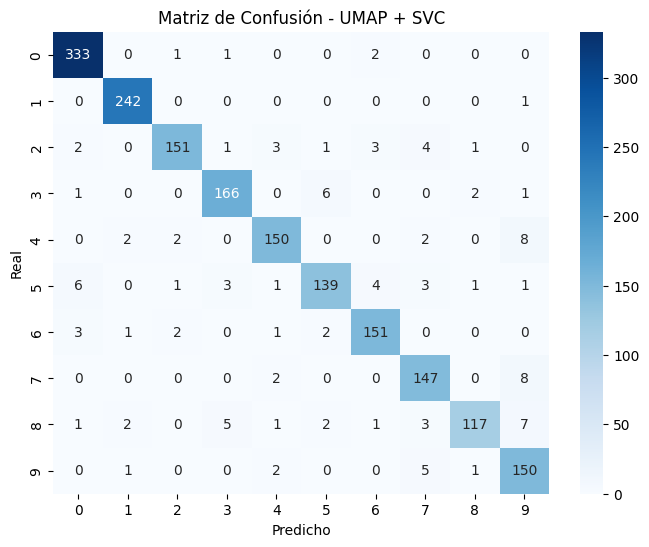

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


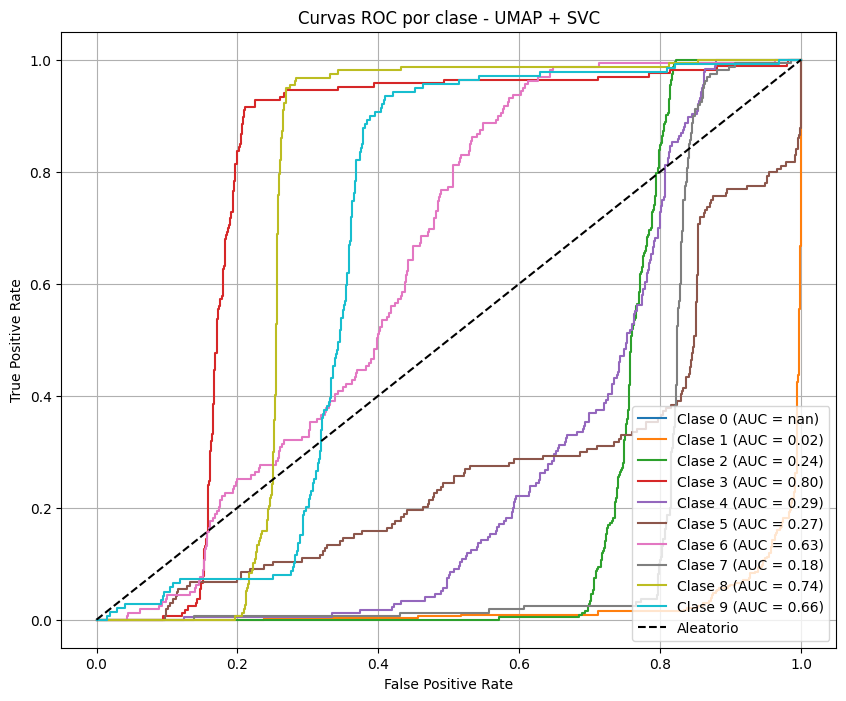

In [11]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap.umap_ as umap

# 1. Cargar y preparar los datos
X, y = fetch_openml('usps', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X = X / 255.0

# 2. Dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Reducci√≥n de dimensionalidad con UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=10, random_state=42)
X_train_umap = umap_model.fit_transform(X_train_scaled)
X_test_umap = umap_model.transform(X_test_scaled)

# 5. Entrenar SVC con kernel RBF
svc = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svc.fit(X_train_umap, y_train)

# 6. Evaluaci√≥n
y_pred = svc.predict(X_test_umap)
acc = accuracy_score(y_test, y_pred)
print(f"üîç Accuracy: {acc:.4f}\n")

print("üìä Classification Report:")
print(classification_report(y_test, y_pred))

# 7. Matriz de Confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusi√≥n - UMAP + SVC")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# 8. Curvas ROC
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_score = svc.predict_proba(X_test_umap)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 9. Visualizaci√≥n
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Clase {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por clase - UMAP + SVC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

svc_pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('umap', umap_model),
    ('svc', svc),
])

### üå≤ 3. UMAP + Random Forest

**Justificaci√≥n**:
- Random Forest es robusto frente a datos ruidosos y altamente interpretativo.
- Combinado con UMAP, aprovecha la reducci√≥n de dimensionalidad para mejorar la clasificaci√≥n sin perder la estructura de los datos.
- No requiere escalado estricto de datos ni una gran cantidad de ajuste de hiperpar√°metros.

**Hiperpar√°metros utilizados**:
- `UMAP`
  - `n_neighbors=15` ‚Üí Buena relaci√≥n entre densidad local y global.
  - `n_components=10` ‚Üí Reducci√≥n adecuada para balancear complejidad y precisi√≥n.
- `RandomForestClassifier`
  - `n_estimators=200` ‚Üí Mayor cantidad de √°rboles ‚Üí mejor generalizaci√≥n.
  - `max_depth=None` ‚Üí Se permite crecimiento completo de los √°rboles.
  - `random_state=42` ‚Üí Para garantizar reproducibilidad.


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


üîç Accuracy: 0.9468

üìä Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       337
           2       0.98      1.00      0.99       243
           3       0.96      0.92      0.94       166
           4       0.96      0.97      0.97       176
           5       0.94      0.92      0.93       164
           6       0.92      0.90      0.91       159
           7       0.94      0.95      0.94       160
           8       0.93      0.95      0.94       157
           9       0.98      0.86      0.91       139
          10       0.87      0.94      0.91       159

    accuracy                           0.95      1860
   macro avg       0.94      0.94      0.94      1860
weighted avg       0.95      0.95      0.95      1860



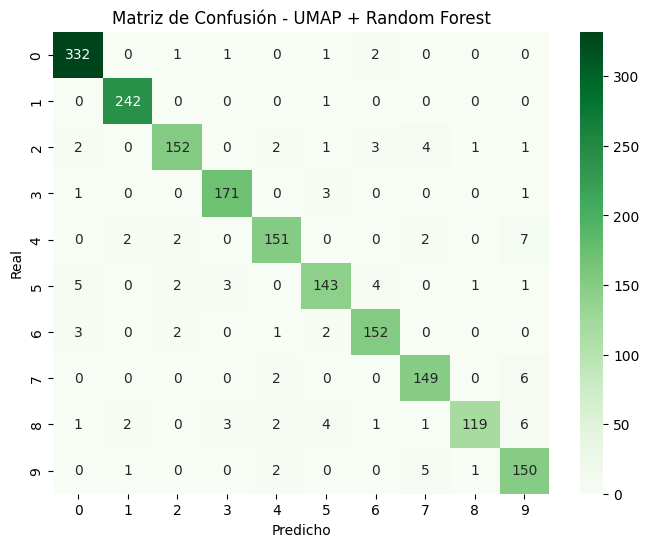

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


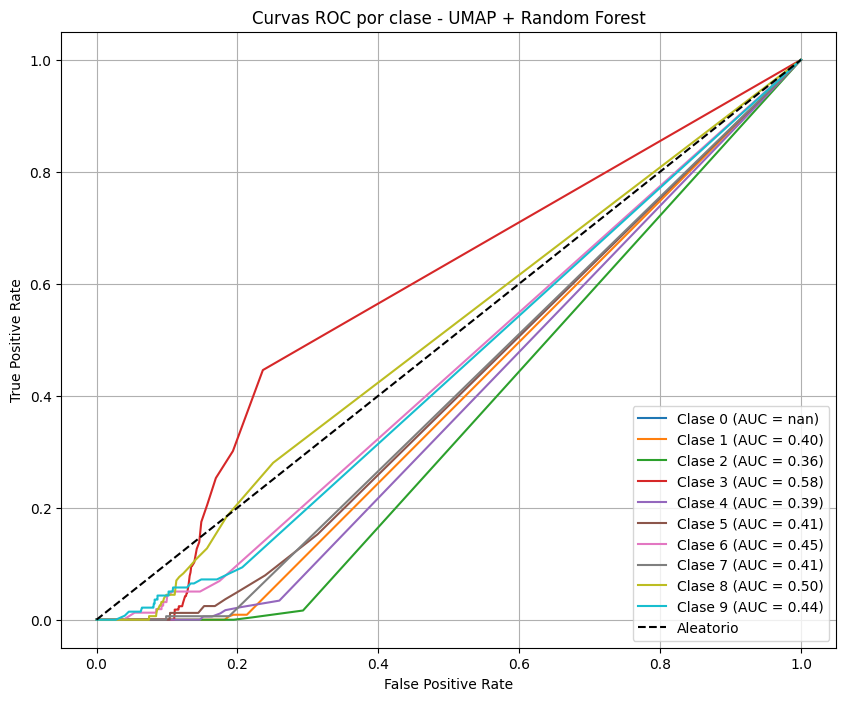

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap.umap_ as umap

# 1. Cargar y preparar datos
X, y = fetch_openml('usps', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X = X / 255.0

# 2. Dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Reducci√≥n con UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=10, random_state=42)
X_train_umap = umap_model.fit_transform(X_train_scaled)
X_test_umap = umap_model.transform(X_test_scaled)

# 5. Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
rf.fit(X_train_umap, y_train)

# 6. Evaluar
y_pred = rf.predict(X_test_umap)
acc = accuracy_score(y_test, y_pred)
print(f"üîç Accuracy: {acc:.4f}\n")

print("üìä Classification Report:")
print(classification_report(y_test, y_pred))

# 7. Matriz de Confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusi√≥n - UMAP + Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# 8. Curvas ROC
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_score = rf.predict_proba(X_test_umap)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Clase {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por clase - UMAP + Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

rf_pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('umap', umap_model),
    ('rf', rf),
])

In [13]:
!mkdir models

In [25]:
import pickle

file_path = 'models/mlp.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(mlp_pipeline, file)

In [15]:
from sklearn.pipeline import Pipeline

file_path = 'models/svc.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(svc_pipeline, file)

In [16]:
file_path = 'models/rf.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(rf_pipeline, file)

In [17]:
!ls models

mlp.pkl  rf.pkl  svc.pkl


In [18]:
!pip install streamlit

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.9/9.9 MB 66.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.9/6.9 MB 92.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


In [19]:
!pip install streamlit-drawable-canvas opencv-python-headless

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 11.2 MB/s eta 0:00:00


In [20]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared

--2025-07-18 02:32:09--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.7.0/cloudflared-linux-amd64 [following]
--2025-07-18 02:32:10--  https://github.com/cloudflare/cloudflared/releases/download/2025.7.0/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/37d2bad8-a2ed-4b93-8139-cbb15162d81d?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-07-18T03%3A17%3A52Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-07-18T0

In [37]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import h5py # Para leer los datos de USPS
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import umap
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from streamlit_drawable_canvas import st_canvas
import cv2
import plotly.graph_objects as go


# --- Configuraci√≥n de la P√°gina ---
st.set_page_config(
    page_title="Dashboard de Clasificaci√≥n USPS",
    page_icon="ü§ñ",
    layout="wide",
)

MODELS_DIR = {
    'Perceptr√≥n multicapa': 'mlp.pkl',
    'Clasificador de Soporte Vectorial (SVC)': 'svc.pkl',
    'Random Forest': 'rf.pkl',
}

@st.cache_data
def load_usps_data():
    """
    Carga el conjunto de datos USPS desde SKLearn.
    """
    # Cargar el conjunto de datos USPS desde OpenML
    usps = fetch_openml("USPS", version=1)

    # Extraer caracter√≠sticas (im√°genes) y etiquetas
    X = usps.data.values  # Las im√°genes est√°n en formato DataFrame
    y = usps.target.astype(int)  # Convertir etiquetas a enteros

    return X, y

X, Y = load_usps_data()

@st.cache_resource
def load_model(model_path):
    """Carga un modelo de clasificaci√≥n desde una ruta de archivo local."""
    try:
        with open(model_path, 'rb') as file:
            model = pickle.load(file)
        return model
    except FileNotFoundError:
        st.error(f"Error: No se encontr√≥ el archivo del modelo en la ruta: {model_path}")
        st.error("Aseg√∫rate de que tus modelos .pkl est√©n en la carpeta 'models/' y los nombres coincidan en el script.")
        return None
    except Exception as e:
        st.error(f"Error al cargar el modelo {model_path}: {e}")
        return None

# --- Interfaz del Dashboard ---
st.title("üìä Dashboard de Comparaci√≥n de Modelos para D√≠gitos USPS")
st.markdown("Compara el rendimiento de modelos de clasificaci√≥n y visualiza los datos subyacentes.")

# --- Muestra de D√≠gitos ---
if X is not None:
    with st.expander("üñºÔ∏è Ver una muestra de los d√≠gitos del dataset"):
        st.subheader("Galer√≠a de D√≠gitos USPS")
        # Seleccionamos 30 im√°genes aleatorias para mostrar
        sample_indices = np.random.choice(X.shape[0], 30, replace=False)
        cols = st.columns(10) # Creamos 10 columnas
        scaler = MinMaxScaler()
        X_normalized = scaler.fit_transform(X)
        for i, idx in enumerate(sample_indices[:10]): # Mostramos las primeras 10 im√°genes
            image = X_normalized[idx].reshape(16, 16)
            label = Y[idx]
            cols[i].image(image, caption=f"Label: {label-1}", width=70)

# --- Contenido Principal ---
if X is not None:
    # --- Barra Lateral para Selecci√≥n de Modelos ---
    with st.sidebar:
        st.header("‚öôÔ∏è Configuraci√≥n")
        selected_models = st.multiselect(
            "Selecciona los modelos a comparar:",
            options=list(MODELS_DIR.keys()),
            default=list(MODELS_DIR.keys()) # Por defecto selecciona todos
        )

    if not selected_models:
        st.warning("Por favor, selecciona al menos un modelo en la barra lateral para continuar.")
    else:
        # --- Comparaci√≥n de Rendimiento ---
        st.header("üöÄ Comparaci√≥n de Rendimiento de Modelos")
        model_objects = {}
        for name in selected_models:
            path = os.path.join('models', MODELS_DIR[name])
            model_objects[name] = load_model(path)
        tabs = st.tabs(selected_models)
        for i, model_name in enumerate(selected_models):
            with tabs[i]:
                model = model_objects[model_name]
                if model:
                    try:
                        y_pred = model.predict(X)
                        accuracy = accuracy_score(Y, y_pred)
                        report = classification_report(Y, y_pred, output_dict=True)
                        cm = confusion_matrix(Y, y_pred)

                        st.metric(label="**Accuracy**", value=f"{accuracy:.4f}")

                        col1, col2 = st.columns([1, 2])
                        with col1:
                            st.subheader("Reporte de Clasificaci√≥n")
                            st.dataframe(pd.DataFrame(report).transpose())
                        with col2:
                            st.subheader("Matriz de Confusi√≥n")
                            fig_cm = px.imshow(cm, text_auto=True,
                                               labels=dict(x="Predicci√≥n", y="Real"),
                                               color_continuous_scale='Blues')
                            st.plotly_chart(fig_cm, use_container_width=True)

                    except Exception as e:
                        st.error(f"No se pudieron generar las predicciones para el modelo {model_name}: {e}")
        # --- Proyecciones de Dimensionalidad ---
        st.header("üåå Visualizaci√≥n de Proyecciones de Datos")
        projection_method = st.selectbox("Selecciona un m√©todo de proyecci√≥n:", ["PCA", "UMAP"])

        with st.spinner(f"Calculando proyecci√≥n {projection_method}..."):
            if projection_method == "PCA":
                pca = PCA(n_components=2)
                X_projected = pca.fit_transform(X)
                labels = {'x': 'Componente Principal 1', 'y': 'Componente Principal 2'}
            else: # UMAP
                reducer = umap.UMAP(n_components=2, random_state=42)
                X_projected = reducer.fit_transform(X)
                labels = {'x': 'Dimensi√≥n UMAP 1', 'y': 'Dimensi√≥n UMAP 2'}

            fig_proj = px.scatter(
                x=X_projected[:, 0], y=X_projected[:, 1],
                color=Y.astype(str),
                title=f"Proyecci√≥n {projection_method} de los datos de prueba",
                labels=labels,
                color_discrete_sequence=px.colors.qualitative.Plotly
            )
            fig_proj.update_layout(legend_title_text='D√≠gito')
            st.plotly_chart(fig_proj, use_container_width=True)
        st.header("‚úçÔ∏è Prueba los Modelos Dibujando un N√∫mero")

        # Dividimos en dos columnas para el layout
        col1, col2 = st.columns([1, 1])

        with col1:
            st.markdown("Dibuja un solo d√≠gito (0-9) en el recuadro. Intenta centrarlo y que sea grande.")
            # Configuraci√≥n del canvas
            canvas_result = st_canvas(
                fill_color="rgba(255, 255, 255, 0)",  # Fondo transparente
                stroke_width=20, # Grosor del trazo
                stroke_color="#FFFFFF", # Color blanco
                background_color="#000000", # Fondo negro
                width=280,
                height=280,
                drawing_mode="freedraw",
                key="canvas",
            )

        with col2:
            if canvas_result.image_data is not None and st.button('Predecir D√≠gito'):
                # 1. Procesar la imagen del canvas
                img_drawn = canvas_result.image_data.astype('uint8')
                # Convertir a escala de grises
                img_gray = cv2.cvtColor(img_drawn, cv2.COLOR_RGBA2GRAY)
                # Redimensionar a 16x16 como los datos de USPS
                img_resized = cv2.resize(img_gray, (16, 16), interpolation=cv2.INTER_AREA)

                # 2. Aplanar y preparar para el modelo
                img_flattened = img_resized.flatten()
                # El modelo espera un array de (1, n_features)
                img_final = img_flattened.reshape(1, -1)

                st.write("As√≠ es como el modelo 've' tu n√∫mero (16x16):")
                st.image(img_resized, width=150)

                # 3. Realizar y mostrar predicciones
                st.subheader("Predicciones de los Modelos:")

                for model_name, model in model_objects.items():
                    if model:
                        try:
                            # Predicci√≥n de la clase
                            prediction = model.predict(img_final)[0]
                            # Predicci√≥n de probabilidades
                            probabilities = model.predict_proba(img_final)[0]

                            st.metric(label=f"**Modelo: {model_name}**", value=f"Predice: {prediction}")

                            # Crear gr√°fico de barras con Plotly
                            fig = go.Figure([go.Bar(
                                x=[str(i) for i in range(10)],
                                y=probabilities,
                                text=[f"{p:.2%}" for p in probabilities],
                                textposition='auto'
                            )])
                            fig.update_layout(
                                title_text=f'Probabilidades para {model_name}',
                                xaxis_title="D√≠gito",
                                yaxis_title="Probabilidad",
                                yaxis=dict(range=[0, 1]) # Eje Y de 0 a 1
                            )
                            st.plotly_chart(fig, use_container_width=True)

                        except Exception as e:
                            st.error(f"No se pudo predecir con {model_name}. ¬øEl modelo tiene el m√©todo 'predict_proba'? Error: {e}")


Overwriting app.py


## Ejecuci√≥n del dashboard
Aseg√∫rate de que el puerto expuesto sea el 8501, en caso de que no vuelve a ejecutar la celda de abajo

In [27]:
#Ejecutar Streamlit
!pkill streamlit
!sleep 5
!streamlit run app.py &>/content/logs.txt &
!sleep 5
!tail /content/logs.txt




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.121.191.82:8501



In [23]:
#Exponer el puerto 8501 con Cloudflare Tunnel
!pkill cloudflared
!cloudflared tunnel --url http://localhost:8501 > /content/cloudflared.log 2>&1 &

#Leer la URL p√∫blica generada por Cloudflare
import time
time.sleep(5)  # Esperar que se genere la URL

import re
found_context = False  # Indicador para saber si estamos en la secci√≥n correcta

with open('/content/cloudflared.log') as f:
    for line in f:
        #Detecta el inicio del contexto que nos interesa
        if "Your quick Tunnel has been created" in line:
            found_context = True

        #Busca una URL si ya se encontr√≥ el contexto relevante
        if found_context:
            match = re.search(r'https?://\S+', line)
            if match:
                url = match.group(0)  #Extrae la URL encontrada
                print(f'Tu aplicaci√≥n est√° disponible en: {url}')
                break  #Termina el bucle despu√©s de encontrar la URL

Tu aplicaci√≥n est√° disponible en: https://no-storm-medal-lover.trycloudflare.com


In [30]:
def load_model(model_path):
    """Carga un modelo de clasificaci√≥n desde una ruta de archivo local."""
    try:
        with open(model_path, 'rb') as file:
            model = pickle.load(file)
        return model
    except FileNotFoundError:
        st.error(f"Error: No se encontr√≥ el archivo del modelo en la ruta: {model_path}")
        st.error("Aseg√∫rate de que tus modelos .pkl est√©n en la carpeta 'models/' y los nombres coincidan en el script.")
        return None
    except Exception as e:
        st.error(f"Error al cargar el modelo {model_path}: {e}")
        return None

_class = load_model("models/mlp.pkl")

In [35]:
def load_usps_data():
    """
    Carga el conjunto de datos USPS desde SKLearn.
    """
    # Cargar el conjunto de datos USPS desde OpenML
    usps = fetch_openml("USPS", version=1)

    # Extraer caracter√≠sticas (im√°genes) y etiquetas
    X = usps.data.values  # Las im√°genes est√°n en formato DataFrame
    y = usps.target.astype(int)  # Convertir etiquetas a enteros
    scaler = MinMaxScaler()

    return X, y

X, y = load_usps_data()

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(
